<a id=top></a>

# **目次**

<b>
    <details>
        <summary>
            <a href=#modules, style='font-size: xx-large'>1. モジュールインポート</a>
            <ul>※サードパーティライブラリ>>>自作モジュール>>>（ここまで本ipynb外）>>>自作関数（本ipynb内）</ul>
        </summary>
    </details>

<details>
    <summary>
        <a href=#data , style='font-size: xx-large'>2. オリジナルデータインポート</a>
    </summary>
</details>

<details>
    <summary>
        <a href='#all', style='font-size: xx-large'>3. 全体</a>
    </summary>
    <table></table>
</details>
    
<details>
    <summary>
        <a href='#sepyear', style='font-size: xx-large'>4. 期間ごと</a>
    </summary>
</details>
</b>


---


<a id=modules></a>

## **1. モジュールインポート**


In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip


# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [2]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [ ]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/technology/'
ex_dir = '../../data/processed/external/schmoch/'
output_dir = '../../output/'


In [ ]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM

color_list = initial_condition.COLOR_LIST

In [2]:
# 自作モジュールインポート
from Scripts.kci import df_to_kci as dtk
from Scripts.vizualize import rank as vr
from Scripts.vizualize import distribution as vd


In [3]:
def ccdf(diversity_col: list):
        freq_array = np.array(np.bincount(diversity_col))
        p_list = []
        cumsum = 0.0
        s = float(freq_array.sum())
        for freq in freq_array:
            if freq != 0:
                cumsum += freq / s
                p_list.append(cumsum)
            else:
                p_list.append(1.0)
                
        ccdf_array = 1 - np.array(p_list)
        if ccdf_array[0] == 0:
            ccdf_array[0] = 1.0
        return ccdf_array

color_list = ['red']+[
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
    'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
    'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
    'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
    'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
    'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
    'sienna', 'steelblue'
    ][10:]


In [1]:
class scatter:
    
    def __init__(self):
        
        return
    
    def scatter_plot(
                     ax, 
                     x:pd.Series, 
                     y:pd.Series, 
                     color:str, 
                     label:str, 
                     alpha:float
                     ):
        corr_num_str = '{:.3f}'.format(x.corr(y))
        ax.scatter(
                    x, y, 
                    color=color, 
                    alpha=0.5, label=f'{period}年度（相関係数：{corr_num_str}）', 
                    )
        
        return None

    def scatter_prop(ax, 
                    prop_dict:dict={
                                    # 全体
                                    'title': '', 
                                    'legend': '', 
                                    
                                    # x軸
                                    'xlabel': '',
                                    'xscale': '', 
                                    
                                    # y軸
                                    'ylabel': '', 
                                    'yscale': '', 
                                    }):
        ax.set_title(prop_dict['title'])
        if prop_dict['legend']!='': ax.set_legend(prop_dict['legend'])
        
        ax.set_xlabel(prop_dict['xlabel'])
        if prop_dict['xscale']!='': ax.set_xscale('log')
        
        ax.set_ylabel(prop_dict['ylabel'])
        if prop_dict['yscale']!='': ax.set_yscale('log')
        
        return None


---


In [4]:
year_start = 1981
year_end = 2010
year_range = 10

ar = 'app'


In [5]:
right_person_df = pd.read_csv(f'../Data/0_RightPerson/{ar}_{year_start}_{year_end}.csv', 
                              encoding='utf-8', 
                              sep=',', 
                              dtype={'segment':str, 
                                    'right_person_name':str, 
                                    f'{ar}_year':np.int64, 
                                    'reg_num':np.int64, 
                                    'ipc_class':np.int64, 
                                    'diversity':np.int64, 
                                    'kh_1':np.float64, 
                                    'kci':np.float64})
right_person_df


,segment,right_person_name,reg_num,ipc_class,diversity,kh_1,kci
0,1981-2010,あすか製薬株式会社,181,19,17,254.000000,1.667732
1,1981-2010,いすゞ自動車株式会社,4255,166,80,165.750000,-0.425131
2,1981-2010,しげる工業株式会社,141,25,23,228.869565,0.044037
3,1981-2010,ぺんてる株式会社,1618,100,52,195.307692,0.334401
4,1981-2010,みのる産業株式会社,208,23,18,209.666667,0.612243
...,...,...,...,...,...,...,...
4759,2001-2010,ＵＢＥ株式会社,1433,97,63,116.031746,0.787791
4760,2001-2010,ＵＤトラツクス株式会社,810,85,59,94.966102,-0.234541
4761,2001-2010,ＹＫＫ株式会社,384,44,31,88.870968,0.468774
4762,2001-2010,ＹＫＫＡＰ株式会社,741,34,19,121.210526,0.223271


In [6]:
for s in right_person_df['segment'].unique():
    print(right_person_df[right_person_df['segment']==s]['diversity'].mean())

37.845201238390096
42.58002936857562
36.65213178294574
33.79514824797844


---


In [7]:
print(color_list)

['red', 'indigo', 'turquoise', 'gold', 'lime', 'coral', 'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen', 'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan', 'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen', 'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen', 'sienna', 'steelblue']


In [8]:
def plot_prop(fig, 
              ax, 
              df, 
              period,
              prop_dict: dict={'combi': [], 
                               'color': 'red', 
                               'title': '', 
                               'xlabel': '', 
                               'ylabel': '', 
                               'legend':'', 
                               
                               }):
    corr_num = round(df[prop_dict['combi'][0]].corr(df[prop_dict['combi'][1]]), 3)
    ax.scatter(df[prop_dict['combi'][0]], 
                df[prop_dict['combi'][1]], 
                color=color_list[0], 
                alpha=0.5, label=f'{period}年度（相関係数：'+'{:.3f}'.format(corr_num)+'）', 
                color=prop_dict['color'])
    ax.set_title(prop_dict['title'])
    ax.set_xlabel(prop_dict['xlabel'])
    ax.set_xlabel(prop_dict['ylabel'])
    
    ax.legend(loc=prop_dict['legend'])

SyntaxError: keyword argument repeated: color (2862827305.py, line 18)

1981-2010 0.663
1981-1990 0.708
1991-2000 0.732
2001-2010 0.72


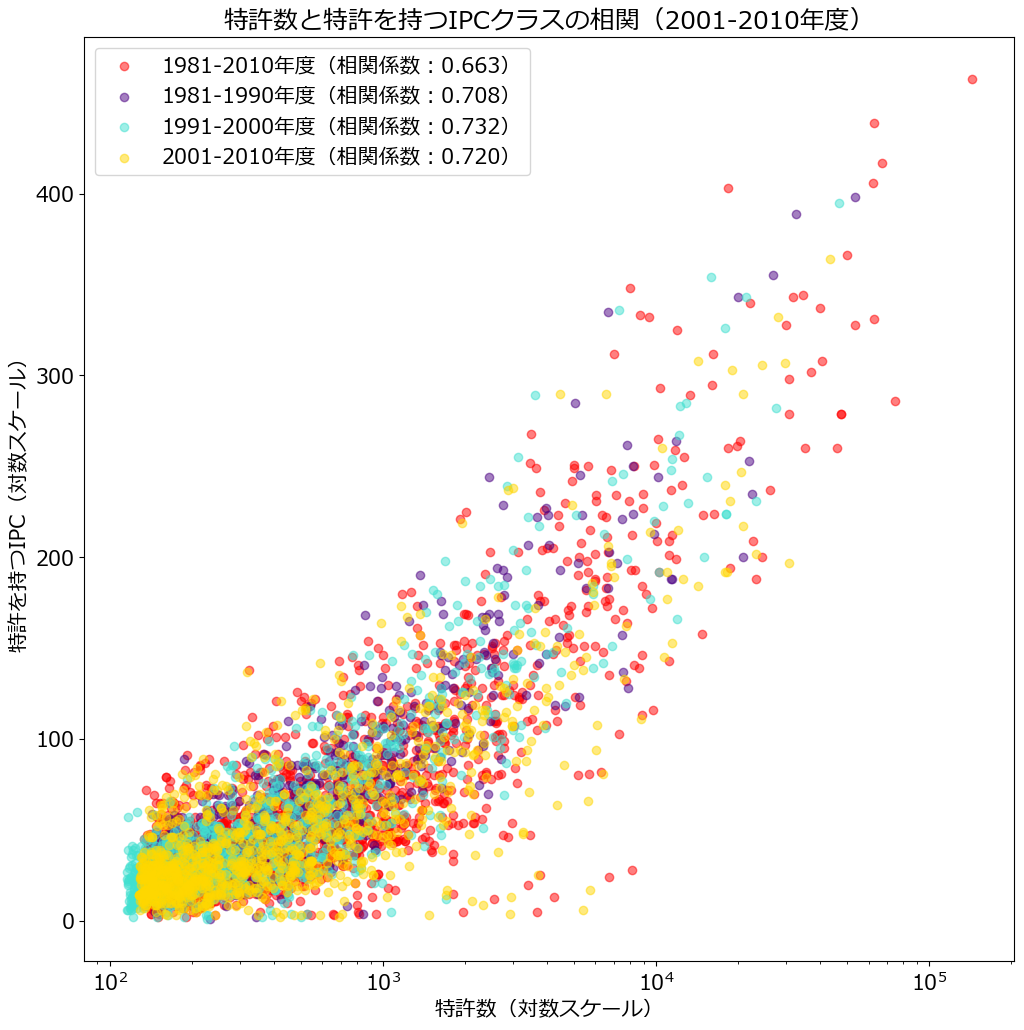

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
color_count = 0
for s in right_person_df['segment'].unique():
#     fig, ax = plt.subplots(figsize=(12, 12))
    corr_num = round(right_person_df[right_person_df['segment']==s]['reg_num'].corr(right_person_df[right_person_df['segment']==s]['ipc_class']), 3)
    print(s, corr_num)
    ax.scatter(right_person_df[right_person_df['segment']==s]['reg_num'], 
               right_person_df[right_person_df['segment']==s]['ipc_class'], 
               alpha=0.5, label=f'{s}年度（相関係数：'+'{:.3f}'.format(corr_num)+'）', color=color_list[color_count])
    ax.set_title(f'特許数と特許を持つIPCクラスの相関（{s}年度）')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_ylabel('特許を持つIPC（対数スケール）')
    ax.set_xlabel('特許数（対数スケール）')
    ax.legend()
    # ax.set_xlim(90, 10**5)
    # ax.set_ylim(-7, 3)
    color_count += 1
    
# ax.scatter(all_info_df['reg_num'], all_info_df['eci'])

1981-2010 0.356
1981-1990 0.452
1991-2000 0.446
2001-2010 0.392


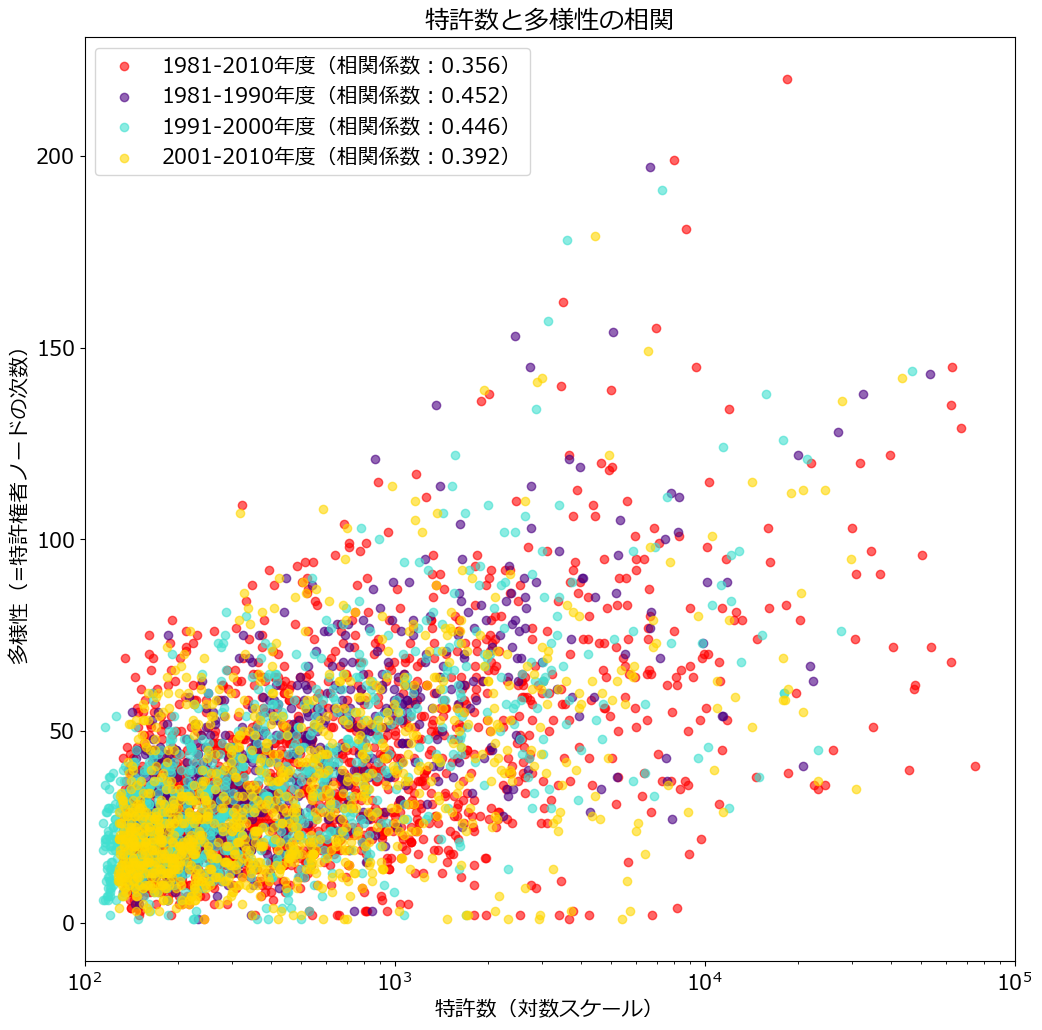

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
color_count = 0
for s in right_person_df['segment'].unique():
    corr_num = round(right_person_df[right_person_df['segment']==s]['reg_num'].corr(right_person_df[right_person_df['segment']==s]['diversity']), 3)
    print(s, corr_num)
    ax.scatter(right_person_df[right_person_df['segment']==s]['reg_num'], 
               right_person_df[right_person_df['segment']==s]['diversity'],
               alpha=0.6, label=f'{s}年度（相関係数：{corr_num}）', color=color_list[color_count])
    ax.set_title('特許数と多様性の相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('多様性（=特許権者ノードの次数）')
    ax.set_xlabel('特許数（対数スケール）')
    ax.set_xlim(10**2, 10**5)
    ax.legend(loc='upper left')
    color_count += 1
    
# ax.scatter(right_person_df['reg_num'], right_person_df['eci'])

<class 'matplotlib.axes._axes.Axes'>
2001-2010 -0.104
1991-2000 -0.139
1981-1990 -0.141
1981-2010 -0.114


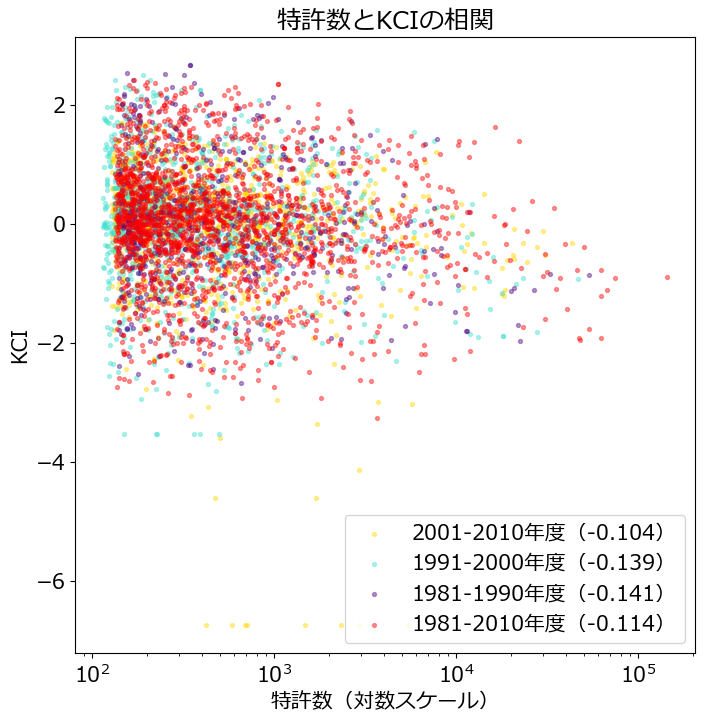

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
print(type(ax))
color_count = 3
for s in list(right_person_df['segment'].unique())[::-1]:
    corr_num = round(right_person_df[right_person_df['segment']==s]['reg_num'].corr(right_person_df[right_person_df['segment']==s]['kci']), 3)
    print(s, corr_num)
    ax.scatter(right_person_df[right_person_df['segment']==s]['reg_num'], 
               right_person_df[right_person_df['segment']==s]['kci'], s=8, 
            #    alpha=0.6, label=f'相関係数：{corr_num}', color=color_list[color_count])
               alpha=0.4, label=f'{s}年度（{corr_num}）', color=color_list[color_count])
    ax.set_title('特許数とKCIの相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('KCI')
    ax.set_xlabel('特許数（対数スケール）')
    # ax.set_xlim(10**2, 10**5)
    ax.legend(loc='lower right')
    # ax.legend(loc='upper right')
    color_count -= 1
    
# ax.scatter(right_person_df['reg_num'], right_person_df['eci'])

<class 'matplotlib.axes._axes.Axes'>
1981-2010 0.101
1981-1990 0.04
1991-2000 0.099
2001-2010 0.218


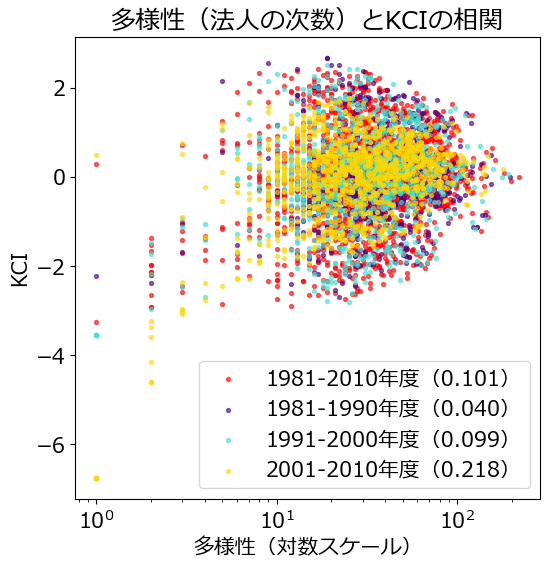

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
print(type(ax))
color_count = 0
for s in right_person_df['segment'].unique():
    corr_num = round(right_person_df[right_person_df['segment']==s]['diversity'].corr(right_person_df[right_person_df['segment']==s]['kci']), 3)
    print(s, corr_num)
    ax.scatter(right_person_df[right_person_df['segment']==s]['diversity'], 
               right_person_df[right_person_df['segment']==s]['kci'], s=8, 
            #    alpha=0.6, label=f'相関係数：{corr_num}', color=color_list[color_count])
               alpha=0.6, label=f'{s}年度（{corr_num:.3f}）', color=color_list[color_count])
    ax.set_title('多様性（法人の次数）とKCIの相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('KCI')
    ax.set_xlabel('多様性（対数スケール）')
    # ax.set_xlim(10**2, 10**5)
    ax.legend(loc='lower right')
    # ax.legend(loc='upper right')
    color_count += 1
    
# ax.scatter(right_person_df['reg_num'], right_person_df['eci'])

In [9]:
right_person_df

,segment,right_person_name,reg_num,ipc_class,diversity,kh_1,kci
0,1981-2010,あすか製薬株式会社,181,19,17,254.000000,1.667732
1,1981-2010,いすゞ自動車株式会社,4255,166,80,165.750000,-0.425131
2,1981-2010,しげる工業株式会社,141,25,23,228.869565,0.044037
3,1981-2010,ぺんてる株式会社,1618,100,52,195.307692,0.334401
4,1981-2010,みのる産業株式会社,208,23,18,209.666667,0.612243
...,...,...,...,...,...,...,...
4759,2001-2010,ＵＢＥ株式会社,1433,97,63,116.031746,0.787791
4760,2001-2010,ＵＤトラツクス株式会社,810,85,59,94.966102,-0.234541
4761,2001-2010,ＹＫＫ株式会社,384,44,31,88.870968,0.468774
4762,2001-2010,ＹＫＫＡＰ株式会社,741,34,19,121.210526,0.223271


In [11]:
right_person_df

,segment,right_person_name,reg_num,ipc_class,diversity,kh_1,kci
0,1981-2010,あすか製薬株式会社,181,19,17,254.000000,1.667732
1,1981-2010,いすゞ自動車株式会社,4255,166,80,165.750000,-0.425131
2,1981-2010,しげる工業株式会社,141,25,23,228.869565,0.044037
3,1981-2010,ぺんてる株式会社,1618,100,52,195.307692,0.334401
4,1981-2010,みのる産業株式会社,208,23,18,209.666667,0.612243
...,...,...,...,...,...,...,...
4759,2001-2010,ＵＢＥ株式会社,1433,97,63,116.031746,0.787791
4760,2001-2010,ＵＤトラツクス株式会社,810,85,59,94.966102,-0.234541
4761,2001-2010,ＹＫＫ株式会社,384,44,31,88.870968,0.468774
4762,2001-2010,ＹＫＫＡＰ株式会社,741,34,19,121.210526,0.223271


1981-2010 -0.037
1981-1990 -0.071
1991-2000 -0.038
2001-2010 0.078


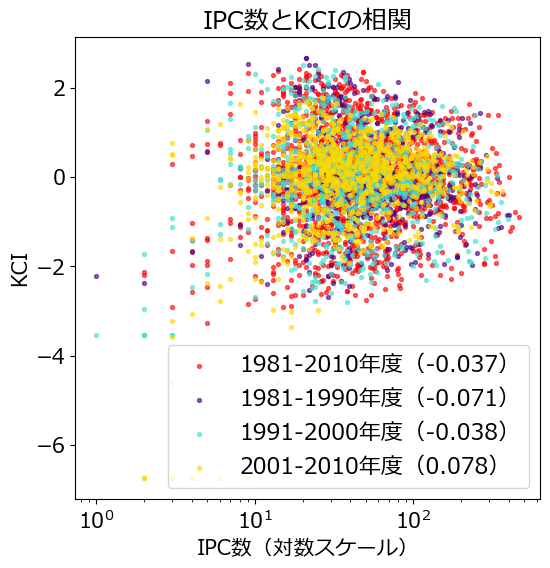

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
color_count = 0
for s in right_person_df['segment'].unique():
    corr_num = round(right_person_df[right_person_df['segment']==s]['ipc_class'].corr(right_person_df[right_person_df['segment']==s]['kci']), 3)
    print(s, corr_num)
    ax.scatter(right_person_df[right_person_df['segment']==s]['ipc_class'], 
               right_person_df[right_person_df['segment']==s]['kci'], s=8, 
            #    alpha=0.6, label=f'相関係数：{corr_num}', color=color_list[color_count])
               alpha=0.6, label=f'{s}年度（{corr_num}）', color=color_list[color_count])
    ax.set_title('IPC数とKCIの相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('KCI')
    ax.set_xlabel('IPC数（対数スケール）')
    # ax.set_xlim(10**2, 10**5)
    ax.legend(loc='lower right', fontsize=16)
    # ax.legend(loc='upper right')
    color_count += 1
    
# ax.scatter(right_person_df['reg_num'], right_person_df['eci'])

In [44]:
right_person_df[right_person_df['segment']=='1981-2010'].sort_values(by='kci', ascending=False).head(15)

,segment,right_person_name,reg_num,ipc_class,diversity,kh_1,kci
439,1981-2010,一丸フアルコス株式会社,169,19,17,232.529412,2.427175
1785,1981-2010,財団法人微生物化学研究会,199,14,13,253.538462,2.386191
1146,1981-2010,松谷化学工業株式会社,222,25,21,181.619048,2.364131
517,1981-2010,不二製油グループ本社株式会社,1043,48,31,148.516129,2.360485
518,1981-2010,不二製油株式会社,1043,48,31,148.516129,2.360485
471,1981-2010,三省製薬株式会社,159,9,8,296.125000,2.341535
789,1981-2010,小川香料株式会社,195,21,19,245.526316,2.339787
1802,1981-2010,長谷川香料株式会社,605,38,33,210.393939,2.304998
488,1981-2010,三菱商事ライフサイエンス株式会社,348,35,32,202.312500,2.300198
532,1981-2010,丸善製薬株式会社,318,22,19,255.473684,2.295270


In [ ]:
right

---


In [10]:
ipc_df = pd.read_csv('../Data/0_IPC/app_1981_2010.csv', 
                     encoding='utf-8', 
                     sep=','
                     )
ipc_df[ipc_df['segment']=='1981-2010']['ipc_class'].nunique()


627

In [11]:
for s in ipc_df['segment'].unique():
    print(s, ipc_df[ipc_df['segment']==s]['ubiquity'].mean())

1981-2010 116.97607655502392
1981-1990 47.771004942339374
1991-2000 62.31466227347611
2001-2010 61.56137479541735
